In [18]:
import random
random.choices(a[1])[0]

7

In [22]:
for i, j in enumerate([3,6,8]):
    print(i, j)

0 3
1 6
2 8


In [42]:
import numpy as np
np.random.normal(60, 3)

53.96004293624866

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import glob
import random

In [3]:
# Read the data from the file
path = "/media/dataanalyticlab/Drive2/MANSOOR/DeFI-Agent/Code/Bonding-Curves/TBC-Agent-Based-Simulation/"

simulation_dir = "linear_TBC_500Agents_For_40Months"
results_file_paths = glob.glob(f"{path}Results/{simulation_dir}/*")
tokens_file_path = results_file_paths[0]
agents_file_path = results_file_paths[1]
transactions_file_path = results_file_paths[2]

save_figures_path_path = path + "Figures/"
bondingCurveType = "linear"

# agents_df = pd.read_csv(agents_file_path, sep=" ")

data = {}
with open(agents_file_path, 'r') as file:
    next(file)  # Skip the header line
    for line in file:
        parts = line.split()
        agent_id = int(parts[0])
        category = str(parts[2])
        init_liquidity = float(parts[1]) 

        if agent_id not in data:
            data[agent_id] = []
        data[agent_id].append((category, init_liquidity))

In [4]:
trans_df = pd.read_csv(transactions_file_path, sep=" ")
trans_df.head()

,TransactionID,AgentID,AgentLiquidity,TransactionType,DeltaSupply,TokenID,TokenCurrentBuyPrice,TokenCurrentSellPrice,TokenCurrentSupply,SimulationMonth
0,0,5,10767.160115,buy,0.217942,1,1.089712,1.089712,0.217942,1
1,1,5,10767.454539,sell,0.188590,1,0.146763,0.146763,0.029353,1
2,2,2,2280.059460,buy,0.034402,2,0.172008,0.172008,0.034402,1
3,3,5,10767.460026,sell,0.025933,1,0.017101,0.017101,0.003420,1
4,4,11,2191.253875,buy,0.260019,2,1.472104,1.472104,0.294421,1


In [5]:
agents_df = pd.read_csv(agents_file_path, sep=" ")
agents_df.head()

,AgentID,AgentLiquidity,AgentPurposeCategory,AgentStrategyType,RiskAppetite,ProActivity,IntelligenceGap,OwnTokenID,DoB,DoD
0,1,1885.368249,Speculator,noisy,0.616345,0.429003,0.000000,0,1,12
1,2,2280.062419,Speculator,noisy,0.625114,0.366963,0.000000,0,2,14
2,3,10625.933710,Investor,charty,0.353070,0.495642,0.000000,0,2,53
3,4,5415.501435,Utilizer,charty,0.480804,0.343648,0.000000,0,1,25
4,5,10767.278863,Investor,fundy,0.217814,0.089512,0.242359,0,2,44


In [6]:
tokens_df = pd.read_csv(tokens_file_path, sep=" ")
tokens_df.head()

,TokenID,OwnerAgentID,LifeCycleCurveShape,DoB,DoD
0,1,12,Seasonal_3x,1,71
1,2,21,Boom_classic_1x,4,75
2,3,39,Boom_classic_4x,7,77
3,4,46,Revival_3x,8,77
4,5,60,Seasonal_1x,7,77


In [8]:
a = trans_df.merge(tokens_df,  on="TokenID", how="left")
a

,TransactionID,AgentID,AgentLiquidity,TransactionType,DeltaSupply,TokenID,TokenCurrentBuyPrice,TokenCurrentSellPrice,TokenCurrentSupply,SimulationMonth,OwnerAgentID,LifeCycleCurveShape,DoB,DoD
0,0,5,10767.160115,buy,0.217942,1,1.089712,1.089712,0.217942,1,12,Seasonal_3x,1,71
1,1,5,10767.454539,sell,0.188590,1,0.146763,0.146763,0.029353,1,12,Seasonal_3x,1,71
2,2,2,2280.059460,buy,0.034402,2,0.172008,0.172008,0.034402,1,21,Boom_classic_1x,4,75
3,3,5,10767.460026,sell,0.025933,1,0.017101,0.017101,0.003420,1,12,Seasonal_3x,1,71
4,4,11,2191.253875,buy,0.260019,2,1.472104,1.472104,0.294421,1,21,Boom_classic_1x,4,75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
813637,813637,288,2025.311887,clearance,0.915500,41,211.572029,211.572029,42.314406,40,399,Extended_Fad_4x,25,92
813638,813638,288,2025.878944,clearance,0.001820,10,311.487955,311.487955,62.297591,40,108,Boom_classic_3x,16,87
813639,813639,288,2037.988327,clearance,0.051729,39,233.704494,233.704494,46.740899,40,388,Fad_2x,25,92
813640,813640,288,2038.012263,clearance,0.000077,12,310.392174,310.392174,62.078435,40,133,Extended_Fad_3x,14,89


In [9]:
token_price_time_series = a.loc[:,['TokenID', 'TransactionID',"LifeCycleCurveShape", 'TokenCurrentBuyPrice']].groupby(["TokenID", "TransactionID","LifeCycleCurveShape"]).head()
token_price_time_series['LifeCycleCurveShape'] = token_price_time_series['LifeCycleCurveShape'].str.replace('_\d+x', '', regex=True)
token_price_time_series = token_price_time_series.sort_values("TokenID")
token_price_time_series

,TokenID,TransactionID,LifeCycleCurveShape,TokenCurrentBuyPrice
0,1,0,Seasonal,1.089712
414186,1,414186,Seasonal,0.000000
56416,1,56416,Seasonal,0.000000
56417,1,56417,Seasonal,0.000000
123439,1,123439,Seasonal,0.000000
...,...,...,...,...
699982,44,699982,Revival,173.042551
725766,44,725766,Revival,178.675785
739494,44,739494,Revival,183.539273
725849,44,725849,Revival,181.493769


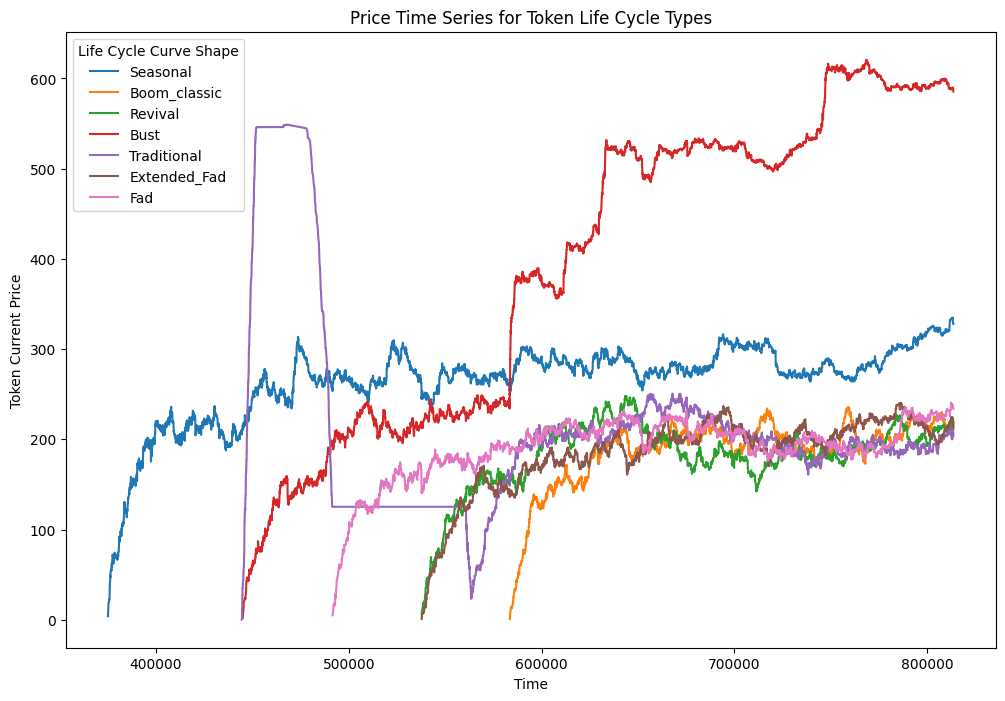

In [44]:
# Creating individual plots for each LifeCycleCurveShape type
unique_types = token_price_time_series['LifeCycleCurveShape'].unique()

plt.figure(figsize=(12, 8))

for i, type in enumerate(unique_types, 1):
    # plt.subplot(4, 2, i)
    type_data = token_price_time_series[token_price_time_series['LifeCycleCurveShape'] == type]
    token_ids = type_data["TokenID"].unique()
    type_data = type_data[type_data["TokenID"] == max(token_ids)]
    sns.lineplot(x='TransactionID', y='TokenCurrentBuyPrice', label=type, data=type_data)

plt.title(f'Price Time Series for Token Life Cycle Types')
plt.xlabel('Time')
plt.ylabel('Token Current Price')
plt.legend(title='Life Cycle Curve Shape')


# plt.tight_layout()
plt.show()

Token Supply/Reserves Collected by Life Cycle Type (Box Plots)

In [9]:
token_supply_diff = a.loc[:,['TokenID', 'TransactionID',"LifeCycleCurveShape", 'TokenCurrentSupply']].groupby(['TokenID', 'LifeCycleCurveShape']).max("TransactionID").reset_index()
token_supply_diff


,TokenID,LifeCycleCurveShape,TransactionID,TokenCurrentSupply
0,1,Traditional_4x,271531,48.333002
1,2,Traditional_4x,729993,87.599810
2,3,Traditional_1x,730069,157.795630
3,4,Bust_2x,729961,68.071271
4,5,Revival_1x,729930,187.001302
...,...,...,...,...
184,194,Fad_1x,730066,16.188910
185,195,Boom_classic_2x,729140,8.291418
186,196,Fad_3x,729990,28.128050
187,197,Seasonal_4x,729904,16.320535


In [15]:
token_supply_diff['LifeCycleCurveShape_Grouped'] = token_supply_diff['LifeCycleCurveShape'].str.replace('_\d+x', '', regex=True)
token_supply_diff

,TokenID,LifeCycleCurveShape,TransactionID,TokenCurrentSupply,LifeCycleCurveShape_Grouped
0,1,Traditional_4x,271531,48.333002,Traditional
1,2,Traditional_4x,729993,87.599810,Traditional
2,3,Traditional_1x,730069,157.795630,Traditional
3,4,Bust_2x,729961,68.071271,Bust
4,5,Revival_1x,729930,187.001302,Revival
...,...,...,...,...,...
184,194,Fad_1x,730066,16.188910,Fad
185,195,Boom_classic_2x,729140,8.291418,Boom_classic
186,196,Fad_3x,729990,28.128050,Fad
187,197,Seasonal_4x,729904,16.320535,Seasonal


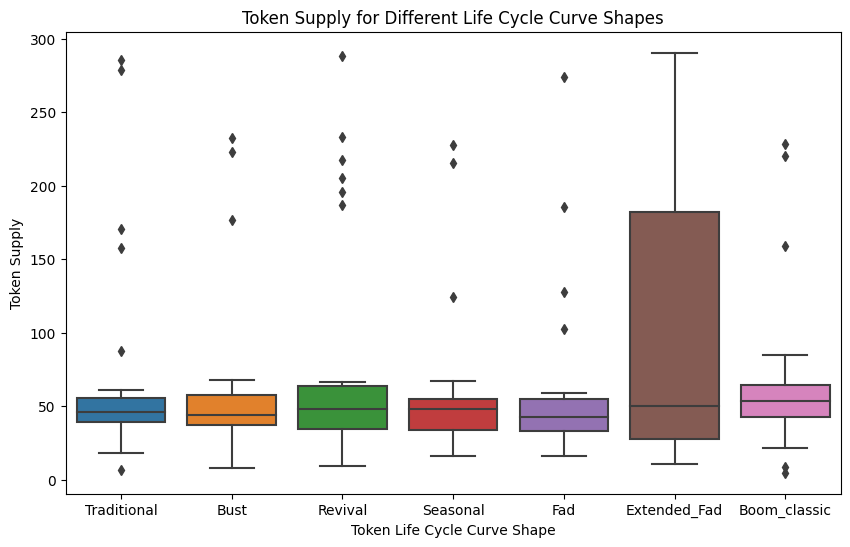

In [18]:
# Plotting the box plots
plt.figure(figsize=(10, 6))
sns.boxplot(x='LifeCycleCurveShape_Grouped', y='TokenCurrentSupply', data=token_supply_diff)
plt.title('Token Supply for Different Life Cycle Curve Shapes')
plt.xlabel('Token Life Cycle Curve Shape')
plt.ylabel('Token Supply')
plt.show()

In [7]:
agent_grouped = trans_df.merge(agents_df,  on="AgentID", how="left")
agent_grouped

,TransactionID,AgentID,AgentLiquidity_x,TransactionType,DeltaSupply,TokenID,TokenCurrentBuyPrice,TokenCurrentSellPrice,TokenCurrentSupply,SimulationMonth,AgentLiquidity_y,AgentPurposeCategory,AgentStrategyType,RiskAppetite,ProActivity,IntelligenceGap,OwnTokenID,DoB,DoD
0,0,5,10767.160115,buy,0.217942,1,1.089712,1.089712,0.217942,1,10767.278863,Investor,fundy,0.217814,0.089512,0.242359,0,2,44
1,1,5,10767.454539,sell,0.188590,1,0.146763,0.146763,0.029353,1,10767.278863,Investor,fundy,0.217814,0.089512,0.242359,0,2,44
2,2,2,2280.059460,buy,0.034402,2,0.172008,0.172008,0.034402,1,2280.062419,Speculator,noisy,0.625114,0.366963,0.000000,0,2,14
3,3,5,10767.460026,sell,0.025933,1,0.017101,0.017101,0.003420,1,10767.278863,Investor,fundy,0.217814,0.089512,0.242359,0,2,44
4,4,11,2191.253875,buy,0.260019,2,1.472104,1.472104,0.294421,1,2191.467625,Speculator,noisy,0.525482,0.694441,0.000000,0,1,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
813637,813637,288,2025.311887,clearance,0.915500,41,211.572029,211.572029,42.314406,40,1970.874825,Speculator,noisy,0.723314,0.503866,0.000000,0,30,40
813638,813638,288,2025.878944,clearance,0.001820,10,311.487955,311.487955,62.297591,40,1970.874825,Speculator,noisy,0.723314,0.503866,0.000000,0,30,40
813639,813639,288,2037.988327,clearance,0.051729,39,233.704494,233.704494,46.740899,40,1970.874825,Speculator,noisy,0.723314,0.503866,0.000000,0,30,40
813640,813640,288,2038.012263,clearance,0.000077,12,310.392174,310.392174,62.078435,40,1970.874825,Speculator,noisy,0.723314,0.503866,0.000000,0,30,40


In [47]:
unique_types

array(['Investor', 'Speculator', 'Utilizer'], dtype=object)

In [69]:
agent_grouped[agent_grouped['AgentPurposeCategory'] == "Investor"].loc[:,['AgentID', "TransactionID", 'AgentPurposeCategory', "AgentLiquidity_x"]]

,AgentID,TransactionID,AgentPurposeCategory,AgentLiquidity_x
0,5,0,Investor,1.076716e+04
1,5,1,Investor,1.076745e+04
3,5,3,Investor,1.076746e+04
9,5,9,Investor,1.076746e+04
10,5,10,Investor,1.076746e+04
...,...,...,...,...
813453,80,813453,Investor,1.019043e+04
813456,82,813456,Investor,1.021798e+00
813457,310,813457,Investor,1.216378e-33
813461,408,813461,Investor,8.079305e+00


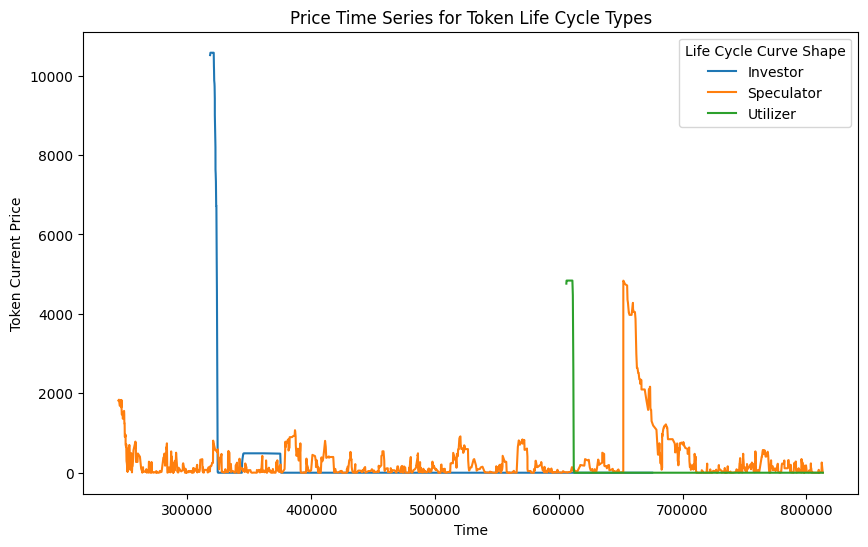

In [84]:
# Creating individual plots for each LifeCycleCurveShape type
unique_types = agent_grouped['AgentPurposeCategory'].unique()

plt.figure(figsize=(10, 6))

for i, type in enumerate(unique_types, 1):
    type_data = agent_grouped[agent_grouped['AgentPurposeCategory'] == type].loc[:,['AgentID', "TransactionID", 'AgentPurposeCategory', "AgentLiquidity_x"]]
    agend_ids = type_data["AgentID"].unique()
    type_data = type_data[type_data["AgentID"] == random.choices(agend_ids)[0]]
    sns.lineplot(x='TransactionID', y='AgentLiquidity_x', label=type, data=type_data)

plt.title(f'Price Time Series for Token Life Cycle Types')
plt.xlabel('Time')
plt.ylabel('Token Current Price')
plt.legend(title='Life Cycle Curve Shape')

plt.show()

In [12]:
agent_liquidity_time_series = agent_grouped.loc[:,['AgentID', 'AgentPurposeCategory', "AgentLiquidity_y"]].groupby(['AgentPurposeCategory']).head()
agent_liquidity_time_series
# = token_price_time_series.sort_values("AgentID")

,AgentID,AgentPurposeCategory,AgentLiquidity_y
0,5,Investor,10767.278863
1,5,Investor,10767.278863
2,2,Speculator,2280.062419
3,5,Investor,10767.278863
4,11,Speculator,2191.467625
5,11,Speculator,2191.467625
6,11,Speculator,2191.467625
7,2,Speculator,2280.062419
9,5,Investor,10767.278863
10,5,Investor,10767.278863


Agent Liquidity Gained/Lost by Purpose Category (Box Plots)

In [92]:
agents_liq_diff = a.loc[:,['AgentID', 'AgentPurposeCategory',"AgentLiquidity_y", "AgentLiquidity_x"]].groupby(['AgentID', 'AgentPurposeCategory']).max("TransactionID")
agents_liq_diff = agents_liq_diff.reset_index()
agents_liq_diff["LiquidityDifference"] = agents_liq_diff.loc[:,"AgentLiquidity_x"] -  agents_liq_diff.loc[:,"AgentLiquidity_y"]
# agents_liq_df = agents_liq_diff.loc[:,["AgentID", "AgentPurposeCategory"]]
agents_liq_diff


,AgentID,AgentPurposeCategory,AgentLiquidity_y,AgentLiquidity_x,LiquidityDifference
0,2,Speculator,1667.633242,19128.740711,17461.107468
1,3,Speculator,2338.826153,6598.328299,4259.502146
2,5,Investor,11388.217389,15120.478989,3732.261600
3,6,Investor,9509.692800,9513.797561,4.104761
4,8,Investor,8261.106790,8270.770417,9.663627
...,...,...,...,...,...
885,1673,Investor,10222.549125,10236.459238,13.910113
886,1676,Speculator,1814.446628,1731.960970,-82.485658
887,1678,Speculator,1925.239977,1925.249757,0.009780
888,1679,Utilizer,5233.677830,5171.285805,-62.392025


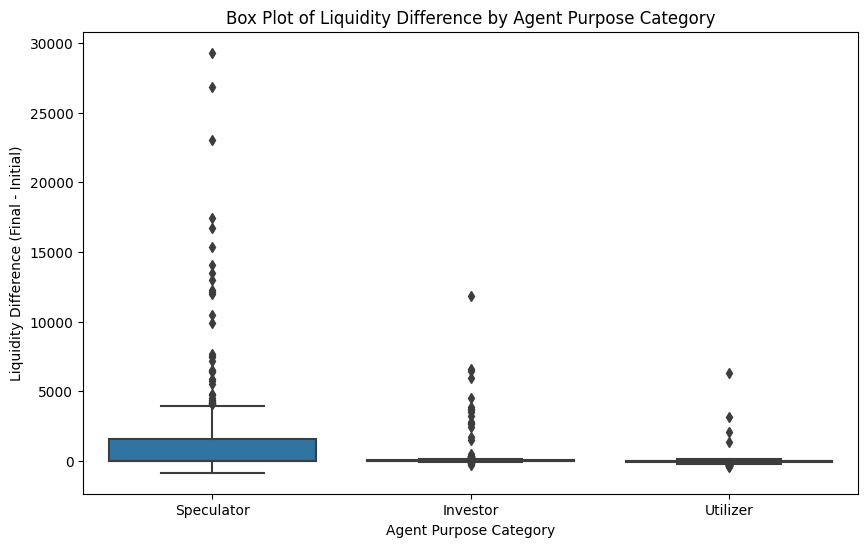

In [93]:
# Plotting the box plots
plt.figure(figsize=(10, 6))
sns.boxplot(x='AgentPurposeCategory', y='LiquidityDifference', data=agents_liq_diff)
plt.title('Box Plot of Liquidity Difference by Agent Purpose Category')
plt.xlabel('Agent Purpose Category')
plt.ylabel('Liquidity Difference (Final - Initial)')
plt.show()

In [ ]:
# Merge the datasets on AgentID
merged_df = pd.merge(trans_df, agents_df[['AgentID', 'AgentPurposeCategory']], on='AgentID')

# Group by PurposeCategory and SimulationMonth or TransactionID
grouped = merged_df.groupby(['AgentPurposeCategory', 'SimulationMonth'])

# Calculate the change in liquidity for each group
liquidity_change = grouped['AgentLiquidity'].sum().unstack()

# Plotting
liquidity_change.plot(kind='line')
plt.title('Change in Liquidity by Purpose Category Over Time')
plt.xlabel('Simulation Month')
plt.ylabel('Liquidity Change')
plt.legend(title='Purpose Category')
plt.show()

<Figure size 640x480 with 0 Axes>

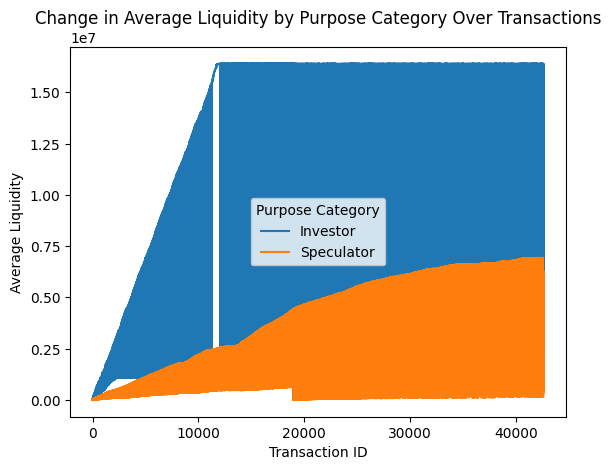

In [37]:
# Merge the datasets on AgentID
merged_df = pd.merge(trans_df, agents_df[['AgentID', 'AgentPurposeCategory']], on='AgentID')

# Sort by TransactionID to ensure correct order of transactions
merged_df.sort_values(by='TransactionID', inplace=True)

# Calculate the running total of liquidity for each agent
merged_df['RunningLiquidity'] = merged_df.groupby('AgentID')['AgentLiquidity'].cumsum()

# Group by PurposeCategory and TransactionID, then calculate the mean liquidity
grouped = merged_df.groupby(['AgentPurposeCategory', 'TransactionID'])['RunningLiquidity'].mean().unstack()
plt.figure()
# Plotting
grouped.T.plot(kind='line') # Transpose to have TransactionID on the x-axis
plt.title('Change in Average Liquidity by Purpose Category Over Transactions')
plt.xlabel('Transaction ID')
plt.ylabel('Average Liquidity')
plt.legend(title='Purpose Category')
plt.show()


In [38]:
merged_df

,TransactionID,AgentID,AgentLiquidity,TransactionType,DeltaSupply,TokenID,TokenCurrentBuyPrice,TokenCurrentSellPrice,TokenCurrentSupply,SimulationMonth,AgentPurposeCategory,RunningLiquidity
0,0,29,2.004140e+03,buy,9.527138e-01,2,4.763569,4.763569,0.952714,1,Speculator,2.004140e+03
885,1,9,1.604834e+03,buy,9.704529e-01,3,4.852265,4.852265,0.970453,1,Speculator,1.604834e+03
4810,2,44,1.135247e+04,buy,2.156373e-01,3,5.930451,5.930451,1.186090,1,Investor,1.135247e+04
4811,3,44,1.135266e+04,sell,3.291382e-02,3,5.765882,5.765882,1.153176,1,Investor,2.270513e+04
4812,4,44,1.135348e+04,sell,1.335696e-01,3,5.098034,5.098034,1.019607,1,Investor,3.405861e+04
...,...,...,...,...,...,...,...,...,...,...,...,...
40460,42606,33,9.908357e+03,sell,2.330092e-243,4,176.259011,176.259011,35.251802,2,Investor,3.507558e+06
30403,42607,41,3.280155e+02,sell,1.787147e-02,3,721.139812,721.139812,144.227962,2,Speculator,4.084623e+05
27391,42608,57,2.399642e-207,buy,8.687625e-209,4,176.259011,176.259011,35.251802,2,Investor,1.232214e+06
16302,42609,22,2.964394e-323,buy,0.000000e+00,4,176.259011,176.259011,35.251802,2,Investor,1.638673e+07
